# Description
*author:* Vina My Pham<br>
*supervisor:* Robin van der Weide<br>
*project:* MSc internship project<br>
<br>
*date:* January 15 - July 26, 2024<br>
*host:* Kind group, Hubrecht Institute<br>
*university:* Bioinformatics, Wageningen University & Research<br>

---
Notebook to view and export subsections of confocal imaging data

> This notebook generates several plots:
> 1. An overview of the separate channels of the middle plane
> 2. The middle plane (channels stacked), including grid and axes, for easy subsection selection
> 3. An overview of the subsection:<br>
>   a. window indicated in the complete middle plane<br>
>   b. the subsection<br>
>   c,d,e. RGB-channels of the subsection separated<br><br>
> (if multiple subsections are made)<br>
> 4. All subsection windows indicated in the complete middle plane.

---
**Input**<br>
1. A three-channel TIF file of the confocal imaging stack.

**Parameters**<br>
...

---
**Output**
...
---
**References**
- https://bioimagebook.github.io/chapters/1-concepts/4-colors/python.html

In [ ]:
#@markdown ## Notebook initialisation

#@markdown **Description:** Dependencies and imports required for this script.

#@markdown **Instructions:** Run this code before anything else.

## imports

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
import skimage.io
import numpy as np

from matplotlib.colors import LinearSegmentedColormap

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## custom colormap


In [ ]:
#https://stackoverflow.com/questions/57268627/matplotlib-color-gradient-between-two-colors

colors = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
redmap = LinearSegmentedColormap.from_list(
        "Black2Red", colors, N=100)

colors = [(0, 0, 0), (0, 1, 0)] # first color is black, last is green
greenmap = LinearSegmentedColormap.from_list(
        "Black2Green", colors, N=100)

colors = [(0, 0, 0), (0, 0, 1)] # first color is black, last is blue
bluemap = LinearSegmentedColormap.from_list(
        "Black2Blue", colors, N=100)

rgb_map = {0:redmap, 1:greenmap, 2:bluemap}

# Input files

**Description:** The user provides the required input files here.

---

**Input:**

**Returns:**


Input stack has shape (Z x X x Y x channels):  (28, 1024, 1024, 3)


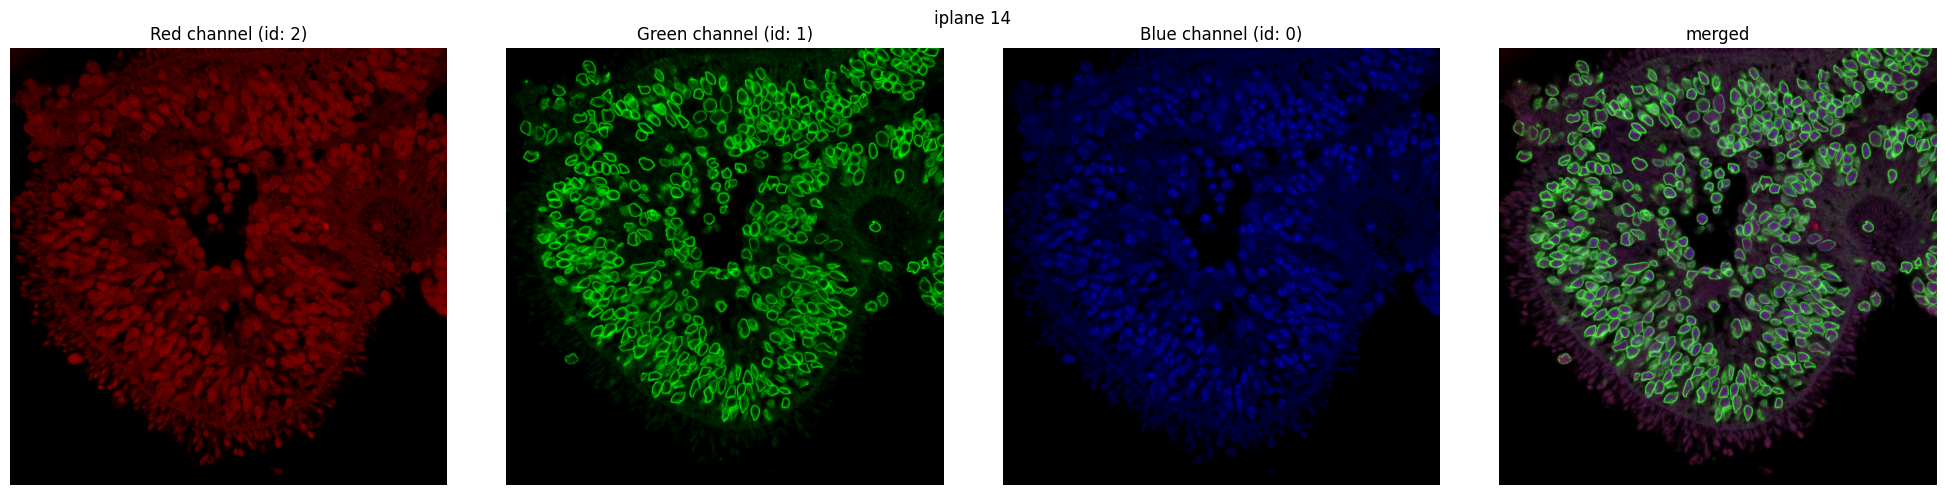

In [176]:
#data load
img = "/content/gdrive/MyDrive/msc-internship_HI_2024_vmp/00_raw_data/full_zstacks/SPE_20240216_D35.tif" #@param {type:"string"}
img = skimage.io.imread(img)

print("Input stack has shape (Z x X x Y x channels): ", img.shape)
nplanes=img.shape[0]

#init
iplane = round(nplanes/2) #middle plane
im = img[iplane, :, :, :]

r_channel = 2
g_channel = 1
b_channel = 0

#visualisation of middle plane
fig, axes = plt.subplots(1,4, figsize=(20,5))

axes[0].imshow(im[:,:,r_channel],cmap=rgb_map.get(0))
axes[0].set_title(f'Red channel (id: {r_channel})')
axes[0].axis(False)

axes[1].imshow(im[:,:,g_channel],cmap=rgb_map.get(1))
axes[1].set_title(f'Green channel (id: {g_channel})')
axes[1].axis(False)

axes[2].imshow(im[:,:,b_channel],cmap=rgb_map.get(2))
axes[2].set_title(f'Blue channel (id: {b_channel})')
axes[2].axis(False)

im_composite = np.dstack((im[:,:,r_channel],im[:,:,g_channel],im[:,:,b_channel]))
axes[3].imshow(im_composite)
axes[3].set_title('merged')
axes[3].axis(False)

plt.suptitle(f"iplane {iplane}")
plt.tight_layout()
plt.show();


# Select subsection

**Description:**

---

**Input:**

**Returns:**


## Show with axes

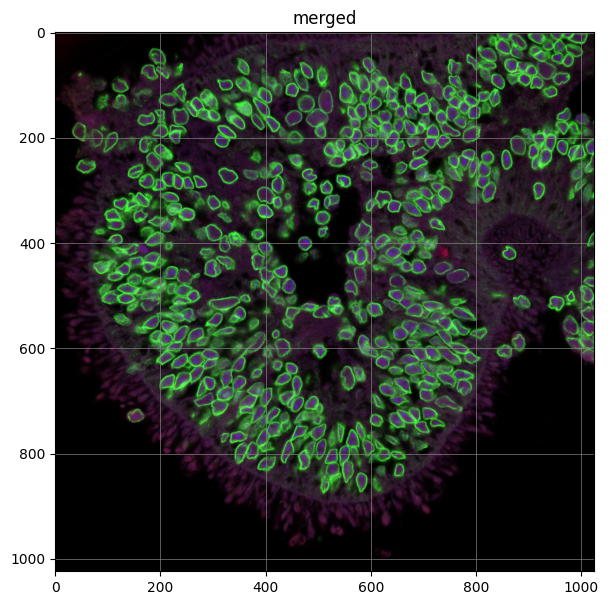

In [177]:
figsize=(7,7) #@param
grid = True #@param {type:"boolean"}

plt.figure(figsize=figsize)
plt.imshow(im_composite)
if grid:
    plt.grid(True, color='gray', linestyle='-', linewidth=0.5)
plt.title('merged');

#init
subsection_coords = []

Window size (x,y): 200 x 200


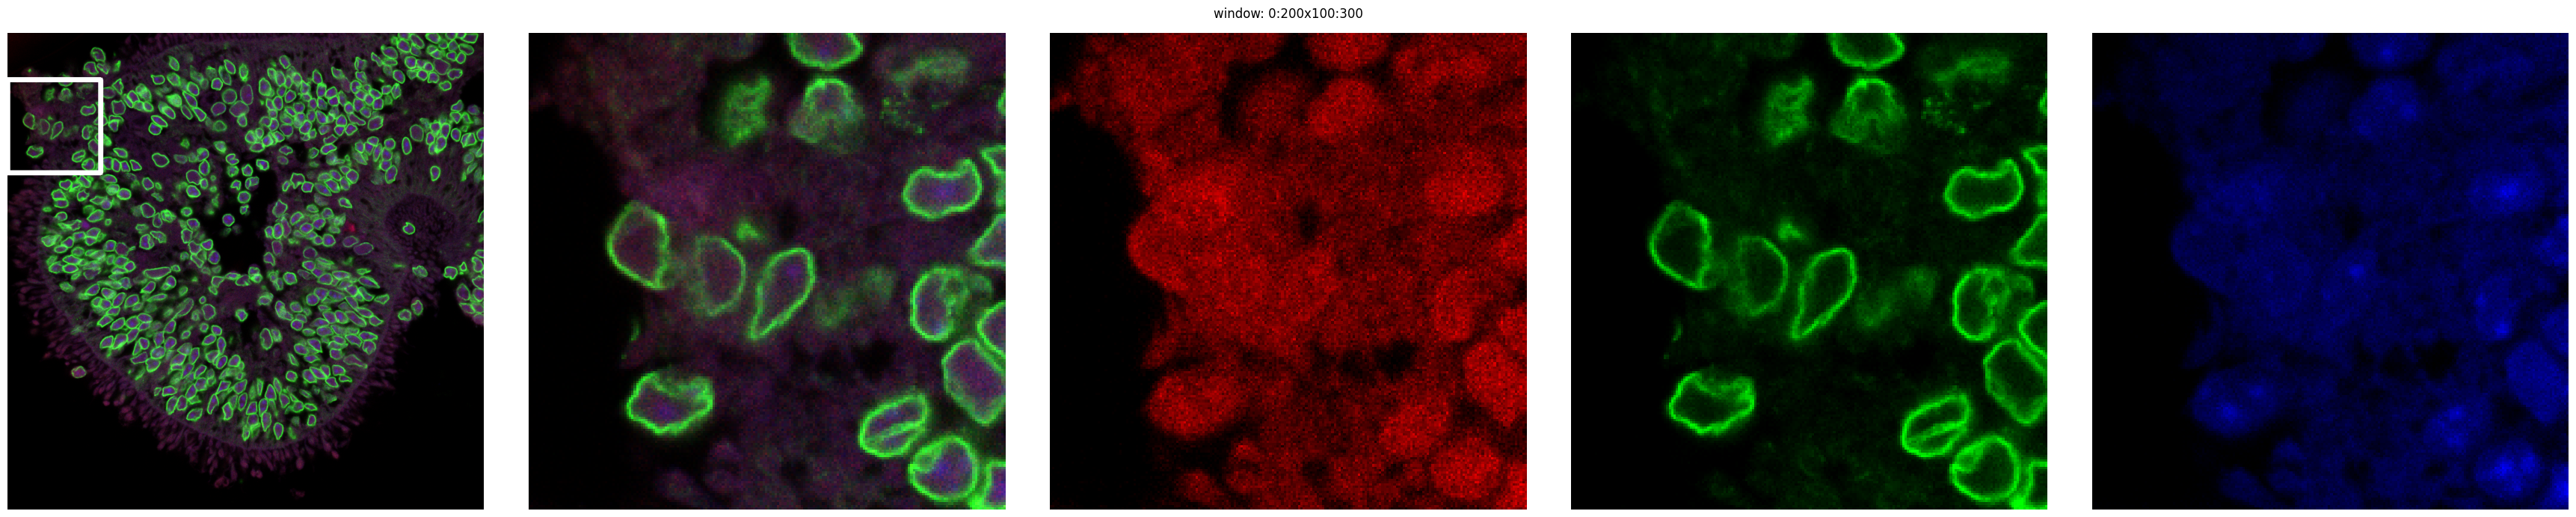

In [185]:
import cv2

#@markdown **coordinate selection**
x0,x1 = (000,200) #@param {type:"raw"}
y0,y1 = (100,300) #@param {type:"raw"}

#@markdown **visualisation options**
figsize=(7*5,7) #@param {type:"raw"}
outline_bgr = (255, 255, 255) #@param {type:"raw"}
outline_width = 10 #@param {type:"number"}

#get subsection
sub_img = im_composite[y0:y1, x0:x1, :]
print(f"Window size (x,y): {x1-x0} x {y1-y0}")

#plot
im_with_outline = np.copy(im_composite)
cv2.rectangle(im_with_outline, (x0, y0), (x1, y1), outline_bgr, outline_width)

fig, axes = plt.subplots(1,2+sub_img.shape[-1], figsize=figsize)
axes[0].imshow(im_with_outline)
axes[0].axis('off')

axes[1].imshow(sub_img)
axes[1].axis('off')

for ichannel in np.arange(sub_img.shape[-1]):
    iplot = ichannel+2
    axes[iplot].imshow(sub_img[:,:,ichannel], cmap=rgb_map.get(ichannel))
    axes[iplot].axis('off')

plt.suptitle(f"window: {x0}:{x1}x{y0}:{y1}")
plt.tight_layout()

plt.show();


subsection_coords.append((x0,x1,y0,y1))
subsection_coords = list(set(subsection_coords))

In [187]:
#print stored subsection coords
print("idx\twindow coordinates")
for idx, window_tup in enumerate(subsection_coords):
    print(idx, '\t', window_tup)
print()


idx	window coordinates
0 	 (600, 800, 100, 300)
1 	 (200, 400, 400, 600)
2 	 (500, 700, 700, 900)
3 	 (0, 200, 100, 300)
4 	 (100, 300, 100, 300)



In [191]:
#optional, remove
subsection_coords.pop(1)

print("idx\twindow coordinates")
for idx, window_tup in enumerate(subsection_coords):
    print(idx, '\t', window_tup)
print()

idx	window coordinates
0 	 (600, 800, 100, 300)
1 	 (500, 700, 700, 900)
2 	 (0, 200, 100, 300)



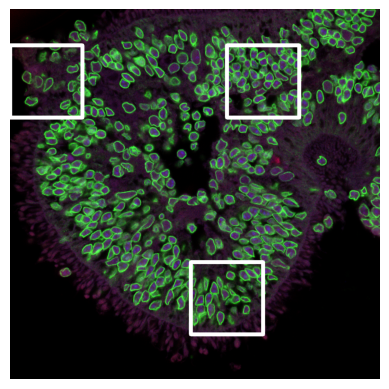

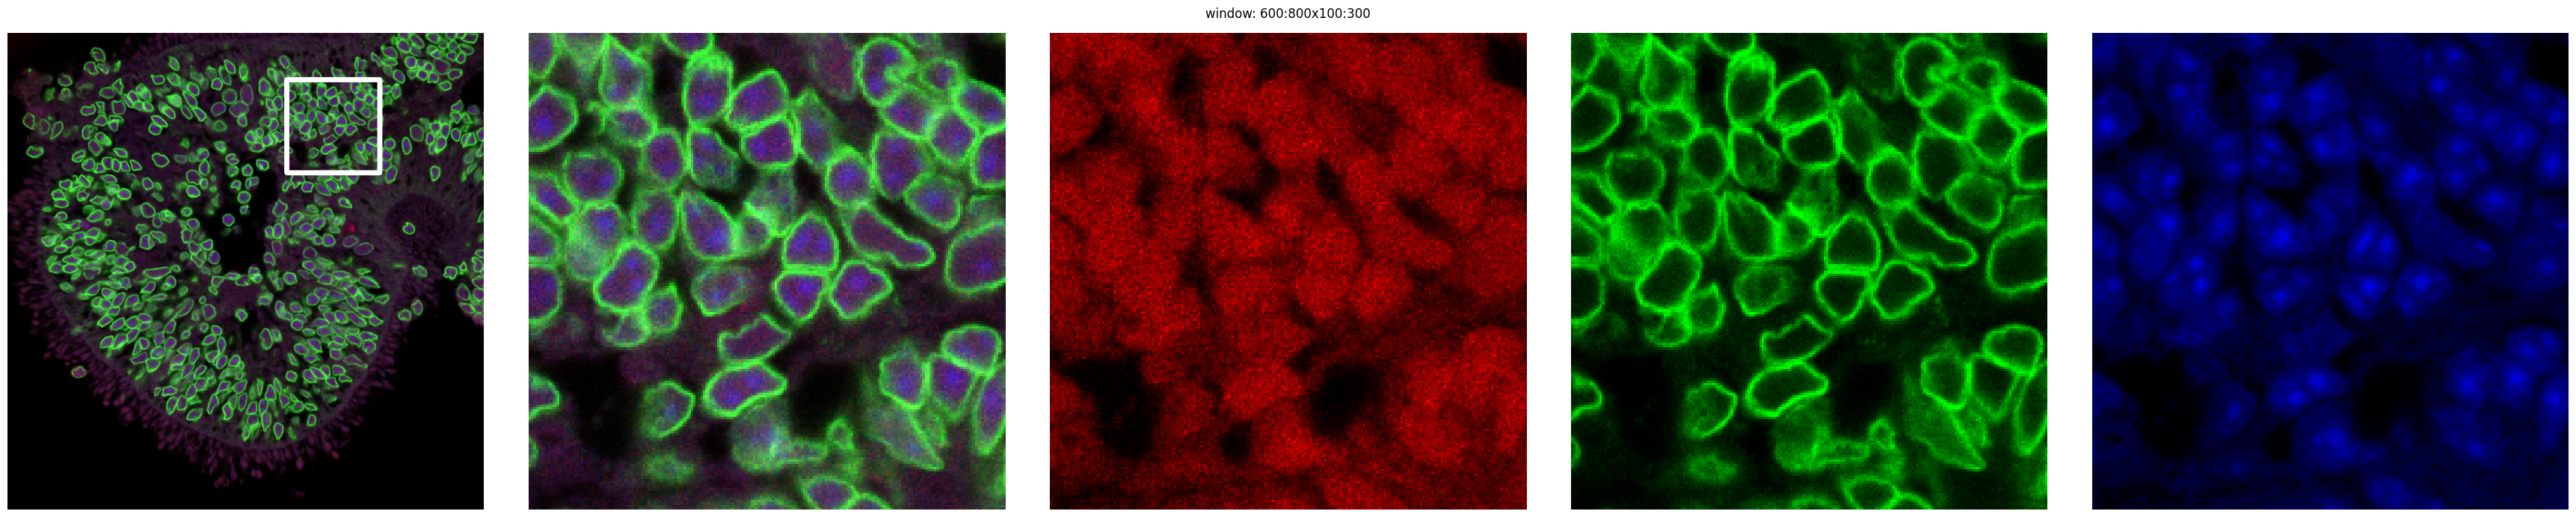

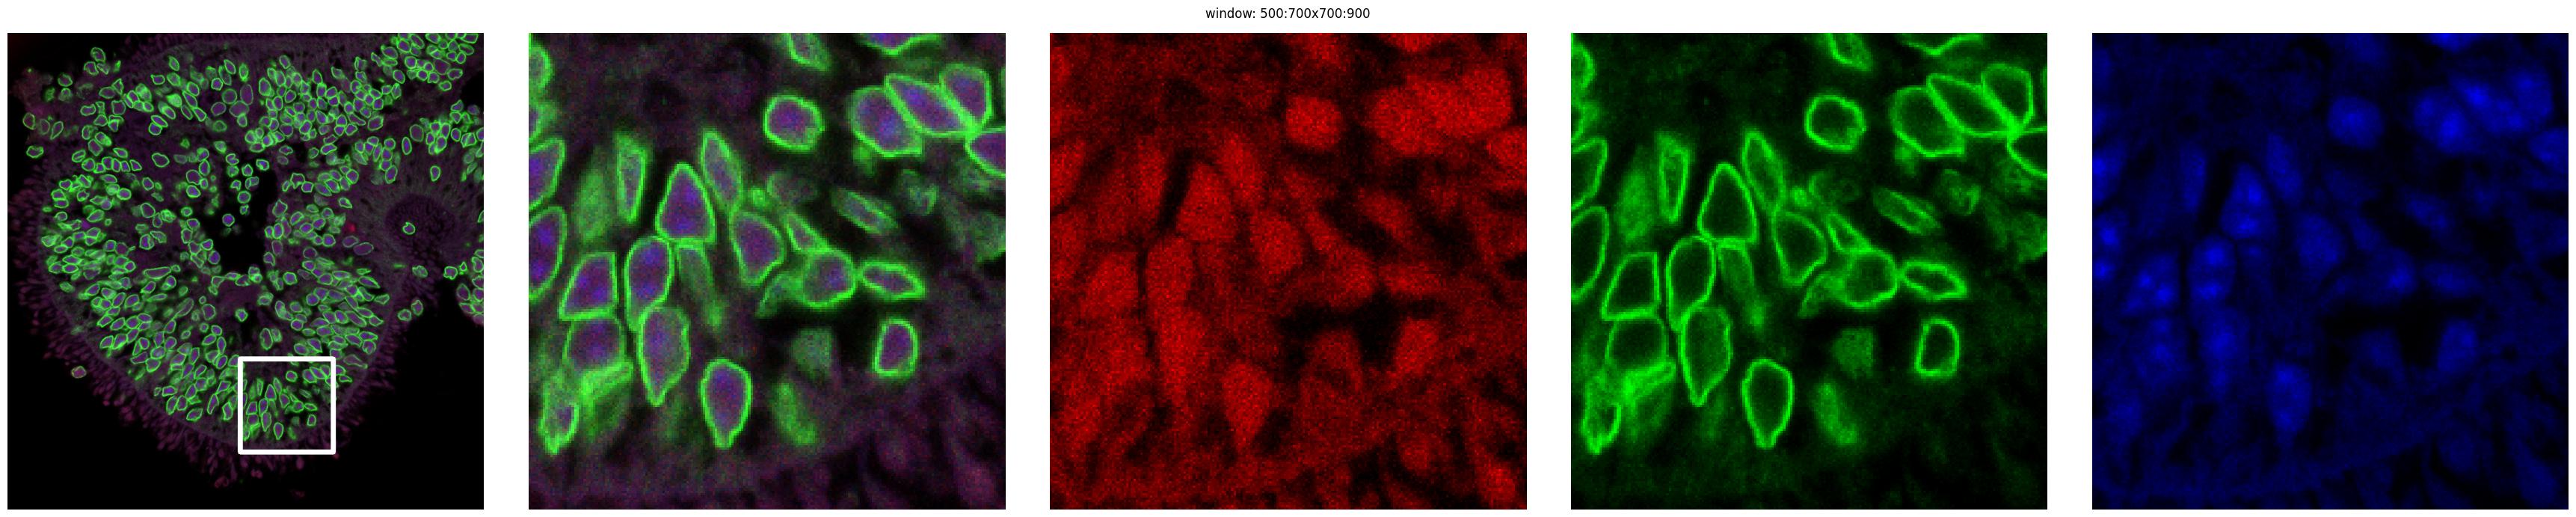

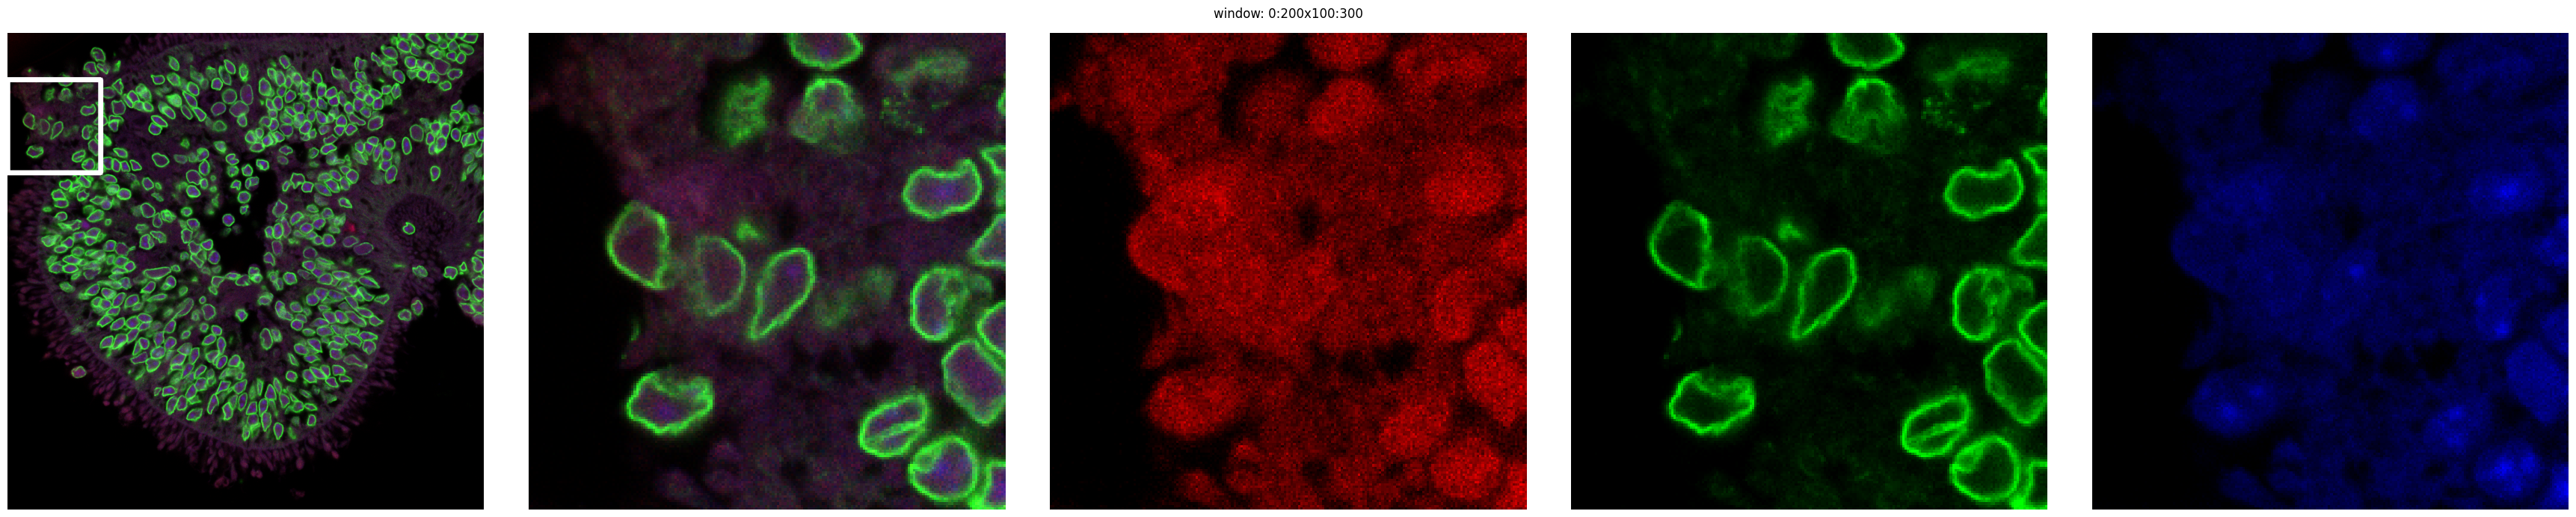

In [192]:
#display all outlines in the composite img
im_with_all_outline = np.copy(im_composite)

for idx, window_tup in enumerate(subsection_coords):
    x0,x1,y0,y1 = window_tup
    cv2.rectangle(im_with_all_outline, (x0, y0), (x1, y1), outline_bgr, outline_width)

plt.imshow(im_with_all_outline)
plt.axis("off");

#display stored subsections, separately
for idx, window_tup in enumerate(subsection_coords):
    x0,x1,y0,y1 = window_tup
    sub_img = im_composite[y0:y1, x0:x1, :]

    #plot
    im_with_outline = np.copy(im_composite)
    cv2.rectangle(im_with_outline, (x0, y0), (x1, y1), outline_bgr, outline_width)

    fig, axes = plt.subplots(1,2+sub_img.shape[-1], figsize=figsize)
    axes[0].imshow(im_with_outline)
    axes[0].axis('off')

    axes[1].imshow(sub_img)
    axes[1].axis('off')

    for ichannel in np.arange(sub_img.shape[-1]):
        iplot = ichannel+2
        axes[iplot].imshow(sub_img[:,:,ichannel], cmap=rgb_map.get(ichannel))
        axes[iplot].axis('off')

    plt.suptitle(f"window: {x0}:{x1}x{y0}:{y1}")
    plt.tight_layout()

    plt.show();


# Export

**Description:**

---

**Input:**

**Returns:**


In [193]:
#print stored subsection coords
print("idx\twindow coordinates")
for idx, window_tup in enumerate(subsection_coords):
    print(idx, '\t', window_tup)
print()


idx	window coordinates
0 	 (600, 800, 100, 300)
1 	 (500, 700, 700, 900)
2 	 (0, 200, 100, 300)



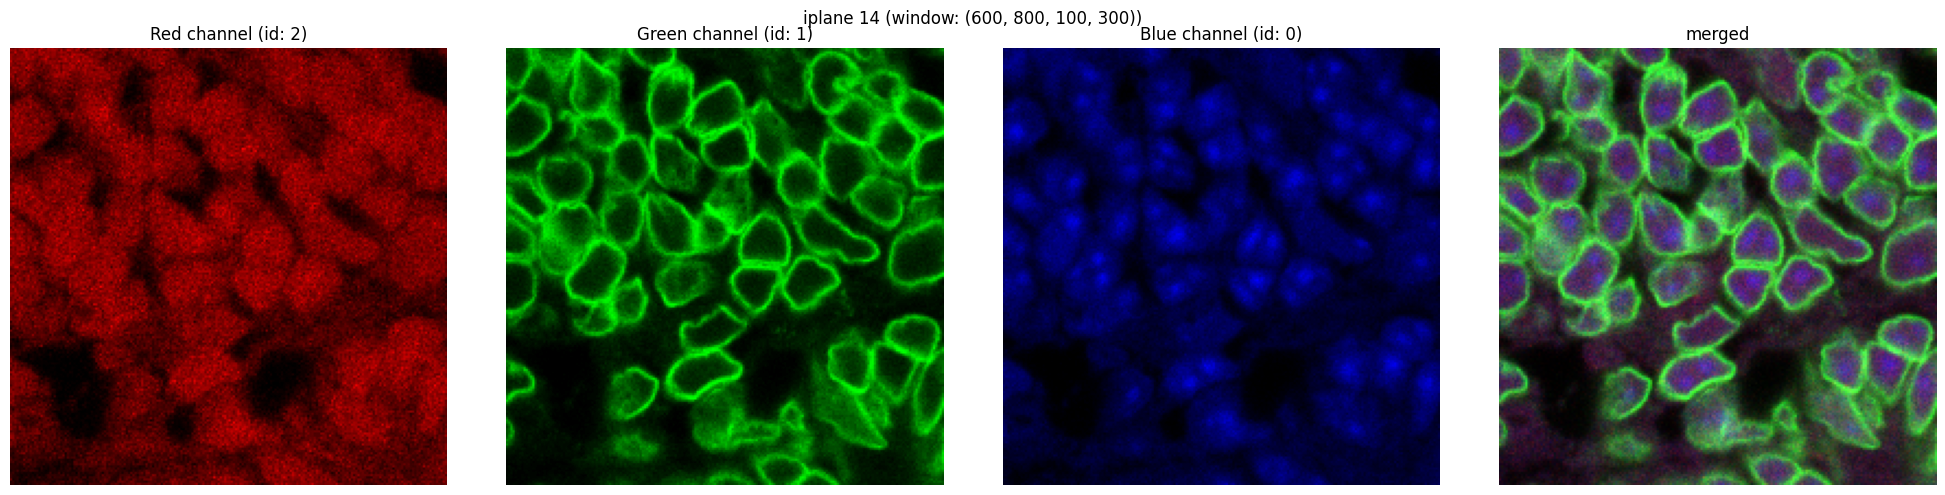

In [200]:
#@markdown [save the portioned img]
select_idx = 0 #@param {type:"number"}
xy_inversed= True #@param {type:"boolean"}
if xy_inversed:
    y0,y1,x0,x1 = subsection_coords[select_idx]
else:
    x0,x1,y0,y1 = subsection_coords[select_idx]
subsection_img = img[:,x0:x1, y0:y1,:]

#init
iplane = round(nplanes/2) #middle plane
im = subsection_img[iplane, :, :, :]

r_channel = 2
g_channel = 1
b_channel = 0

#visualisation of middle plane
fig, axes = plt.subplots(1,4, figsize=(20,5))

axes[0].imshow(im[:,:,r_channel],cmap=rgb_map.get(0))
axes[0].set_title(f'Red channel (id: {r_channel})')
axes[0].axis(False)

axes[1].imshow(im[:,:,g_channel],cmap=rgb_map.get(1))
axes[1].set_title(f'Green channel (id: {g_channel})')
axes[1].axis(False)

axes[2].imshow(im[:,:,b_channel],cmap=rgb_map.get(2))
axes[2].set_title(f'Blue channel (id: {b_channel})')
axes[2].axis(False)

im_composite = np.dstack((im[:,:,r_channel],im[:,:,g_channel],im[:,:,b_channel]))
axes[3].imshow(im_composite)
axes[3].set_title('merged')
axes[3].axis(False)

plt.suptitle(f"iplane {iplane} (window: {subsection_coords[select_idx]})")
plt.tight_layout()
plt.show();

In [ ]:
out_dir = "/content/gdrive/MyDrive/msc-internship_HI_2024_vmp/00_raw_data/full_zstacks/sub/" #@param {type:"string"}
out_name = f"SPE_20230327_D35_x{x0}-{x1}_y{y0}-{y1}.tif" #@param {type: "raw"}

skimage.io.imsave(out_dir+"/"+out_name, sliced_img)

# Dump zone

In [ ]:
def colorise(channel_matrix, color):
    """Colorize a grayscale channel with the given RGB color

    Args:

    Returns:
    """
    rgb = {'G': (0, 0, 1),
                'B': (0, 1, 0),
                'R': (1, 0, 0)}

    colorised = np.stack((channel_matrix * rgb[color],
                     channel_matrix * rgb[color],
                     channel_matrix * rgb[color]), axis=-1)

    return colorised.astype(np.uint8)



In [ ]:
im = img[iplane, :, :, :]
im_red = colorise(im[..., 0], 'R')
im_green = colorise(im[..., 1], 'G')
im_blue = colorise(im[..., 2], 'B')

ValueError: operands could not be broadcast together with shapes (1024,1024) (3,) 